In [2]:
from matplotlib import pyplot
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from SGD import SGD

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



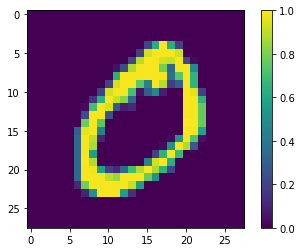

In [13]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [4]:
array = [tf.keras.layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10,)]
nn = keras.Sequential(array)

In [5]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Preprocessing data.
imgs = tf.reshape(x_train, (len(x_train),28,28))
labels = np.zeros((len(y_train),1,10))
for z, y in zip(labels, y_train):
    z[0][y] = 1
    

In [7]:
imgs[0].shape


TensorShape([28, 28])

In [8]:
labels.shape

(60000, 1, 10)

In [9]:
labels[0:2].shape

(2, 1, 10)

In [18]:
[np.argmax(label) for label in labels][0:4]S

[5, 0, 4, 1]

In [7]:

n = len(imgs)
batch = 64
l = []
trajectory = []
optimizer = SGD(0.01)
for _ in tqdm(range(5000)):
    i = np.random.randint(n - batch)
    x = tf.reshape(imgs[i:i + batch], (batch,28,28))
    with tf.GradientTape() as tape:
        tape.watch(nn.trainable_variables)        
        target = tf.reduce_mean(tf.square(labels[i: i + batch] - nn(x)))
    #List of gradients
    grads = tape.gradient(target, nn.trainable_variables)
    optimizer.apply_gradients(grads, nn.trainable_variables)
    l.append(target)
    trajectory.append(nn.trainable_variables)

# The nn structure should be coded from scratch so we can save the trainable
# variables during the training loop. The dimensionality of the problem needs to be
# treated carefully since the input consists of 28x28 shaped matrices. 

100%|██████████| 5000/5000 [00:31<00:00, 159.68it/s]


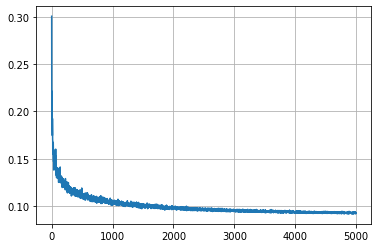

In [11]:
plt.plot(l)
plt.grid()

In [9]:
for w in nn.trainable_variables:
    print(w.shape)

(784, 128)
(128,)
(128, 10)
(10,)


In [17]:
w[0].shape

TensorShape([784, 128])

In [19]:
h = 30
flatten_trajectory = []
for w in trajectory:
    w[0] = tf.reshape(w[0], shape=(w[0].shape[0] * w[0].shape[1]))
    w[1] = tf.reshape(w[1], shape=(w[1].shape[0]))
    w[2] = tf.reshape(w[2], shape=(w[2].shape[0] * w[2].shape[1]))
    w[3] = tf.reshape(w[3], shape=(w[3].shape[0])) 
    w = tf.concat(w, 0)
    flatten_trajectory.append(w)

In [20]:
norm_trajectory = [tf.norm(t) for t in flatten_trajectory]

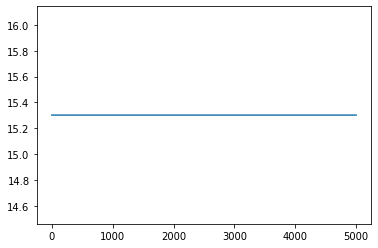

In [21]:
plt.plot(norm_trajectory)